In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('customer_segmentation_data.csv')

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Marital Status,Employment Status,Number of Children,Education Level,Membership Level,Years as Customer
0,1,Male,49,22,12,Single,Unemployed,3,Bachelor's,Premium,7
1,2,Female,56,41,25,Married,Unemployed,4,Master's,Basic,18
2,3,Male,66,41,52,Married,Employed,3,High School,Premium,4
3,4,Male,69,35,85,Married,Employed,4,Master's,Silver,2
4,5,Male,49,44,100,Married,Employed,4,Bachelor's,Premium,14


In [79]:


df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})
df['Marital Status'] = df['Marital Status'].map({'Single': 0, 'Married': 1})
df['Employment Status'] = df['Employment Status'].map({'Employed': 0, 'Unemployed': 1, 'Self-employed': 2})
df['Membership Level'] = df['Membership Level'].map({'Basic': 0, 'Silver': 1, 'Premium': 2})
df.drop(['CustomerID'], axis=1, inplace=True)
df.drop( ['Education Level'], axis=1, inplace=True)

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


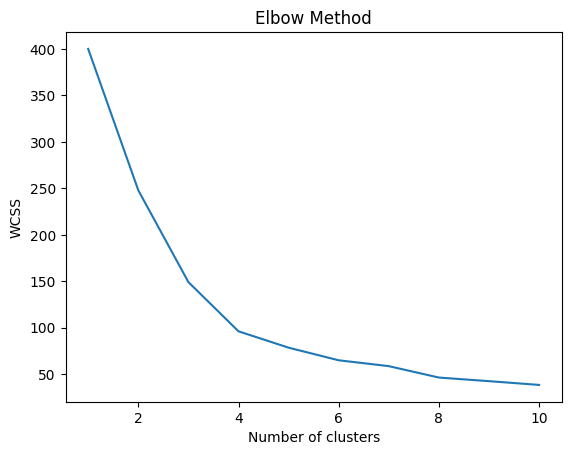

In [80]:

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [81]:

kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


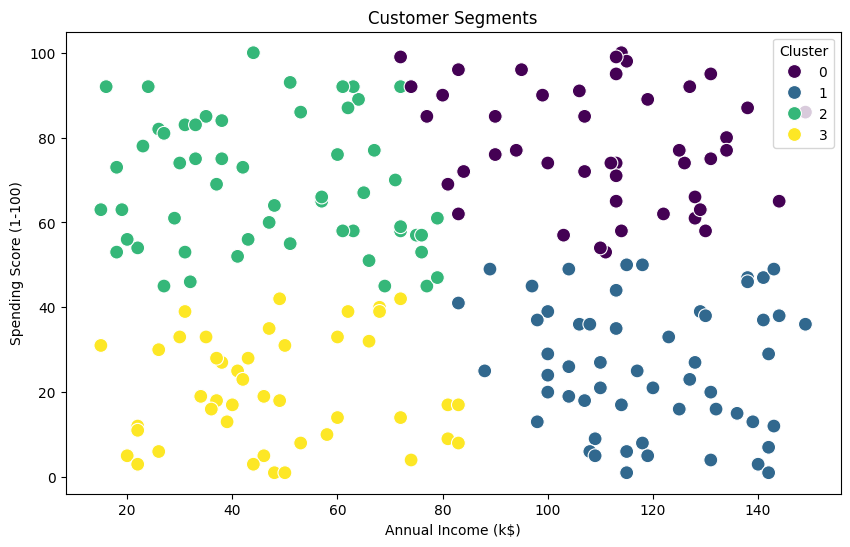

In [82]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'],
                hue=df['Cluster'], palette='viridis', s=100)
plt.title('Customer Segments')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()


In [83]:

cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


def marketing_strategy(cluster):
    if cluster == 0:
        return "Premium offers and loyalty programs"
    elif cluster == 1:
        return "Discounts and budget-friendly options"
    elif cluster == 2:
        return "Family-oriented promotions"
    elif cluster == 3:
        return "Standard campaigns for moderate spenders"

df['Marketing Strategy'] = df['Cluster'].apply(marketing_strategy)


df[['Annual Income (k$)', 'Spending Score (1-100)', 'Cluster', 'Marketing Strategy']]


           Gender        Age  Annual Income (k$)  Spending Score (1-100)  \
Cluster                                                                    
0        0.555556  44.422222          110.244444               78.133333   
1        0.563636  43.363636          118.963636               26.036364   
2        0.392857  45.857143           47.017857               68.321429   
3        0.500000  43.840909           47.863636               20.409091   

         Marital Status  Employment Status  Number of Children  \
Cluster                                                          
0              0.422222           1.177778            2.133333   
1              0.490909           0.909091            1.672727   
2              0.571429           1.035714            1.910714   
3              0.477273           0.840909            2.295455   

         Membership Level  Years as Customer  
Cluster                                       
0                1.088889          11.355556  
1    

,Annual Income (k$),Spending Score (1-100),Cluster,Marketing Strategy
0,22,12,3,Standard campaigns for moderate spenders
1,41,25,3,Standard campaigns for moderate spenders
2,41,52,2,Family-oriented promotions
3,35,85,2,Family-oriented promotions
4,44,100,2,Family-oriented promotions
...,...,...,...,...
195,97,45,1,Discounts and budget-friendly options
196,125,77,0,Premium offers and loyalty programs
197,131,4,1,Discounts and budget-friendly options
198,83,62,0,Premium offers and loyalty programs


In [75]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df['Cluster'])
print(f'Silhouette Score: {score}')

Silhouette Score: 0.4184276088159162


In [76]:

annual_income = float(input("Enter Annual Income (k$): "))
spending_score = int(input("Enter Spending Score (1-100): "))

new_data = np.array([[annual_income, spending_score]])
new_data_scaled = scaler.transform(new_data)
predicted_cluster = kmeans.predict(new_data_scaled)[0]

suggested_strategy = marketing_strategy(predicted_cluster)

print(f"Based on your income and spending, we recommend: {suggested_strategy}")


Enter Annual Income (k$): 99
Enter Spending Score (1-100): 98
Based on your income and spending, we recommend: Premium offers and loyalty programs


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
